In [1]:
import os 

os.chdir("D:\Education programs\DEBI\datasets")
os.getcwd()

'D:\\Education programs\\DEBI\\datasets'

### naming convintions
- feature = predictor variable = indepentant variable 
- target variable = dependant variable = response variable 

## supervised learning (need label data)
- historical data with label
- experiments to get label data 
- crowd-source label data 
## Exploratory data analysis (EDA)
   explore your data to get insides 


data type of dataset is <class 'sklearn.utils.Bunch'>

print dataset keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

type of data and target is (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)

# samples, # features (150, 4)

target data is 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

print data in dataframe

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5        

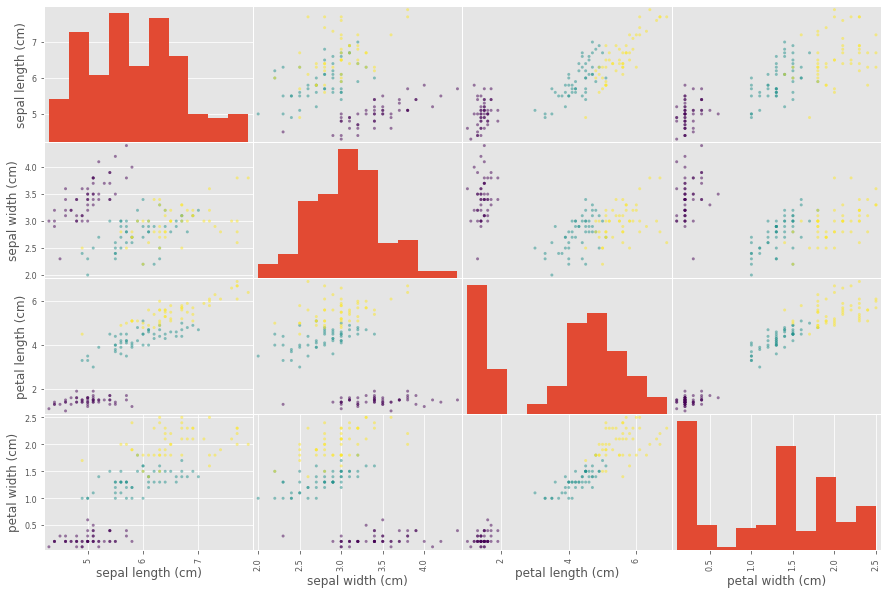

In [2]:
from sklearn import datasets
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

iris = datasets.load_iris()
# <class 'sklearn.utils.Bunch'> this is like dictionary key-value pairs 
print(f"\ndata type of dataset is {type(iris)}")

print(f"\nprint dataset keys : {iris.keys()}")

print(f"\ntype of data and target is {type(iris.data), type(iris.target)}")
# number of number of observation and number of freatures 
print(f"\n# samples, # features {iris.data.shape}" )

print("\ntarget data is \n")
print(iris.target)

x = iris.data 
y = iris.target

df = pd.DataFrame(x, columns= iris.feature_names)
print("\nprint data in dataframe\n")
print(df.head())

print("*" *10 , "Visial EDA", "*" * 10)

pd.plotting.scatter_matrix(df, figsize= (15, 10), c= y);

## classifier
   the simplest classifier is `knn`
   - looking at the k closest labeled data point
   - taking the majority vote
   - algorithm has two sides (learing & predict)
       - training on data = fitting a model to the data 
       - `.fit`: fit method
       - `.predict`: method predict new unlabel data 

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# new_sample =   np.random.randint(0, 5, [4, 4])
new_sample =   5 * np.random.random_sample([4, 4])
predicitons = knn.predict(new_sample)
predicitons

array([2, 1, 1, 1])

In [6]:
df = pd.read_csv("Congressional Voting Records/house-votes.data.csv")
df.head(2)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


In [7]:
df.fillna(value={"n": 0, "y": 1}, inplace= True)

In [8]:
df.replace("n", 0, inplace= True)
df.replace("y", 1, inplace= True)
df.replace("?", None, inplace= True);

In [13]:
df1 = pd.read_csv("titanic/train.csv")

In [15]:
df1.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [28]:
d = df1.dropna?

Signature: df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. versionchanged:: 1.0.0

       Pass tuple or list to drop on multiple axes.
       Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.

thresh : int, optional
    Require that many non-NA values.
subset : array-like, opti

In [ ]:
d = df1.dropna

In [27]:
d.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64